# Chute d'un corps dans un milieu visqueux

## Présentation
- **Voie et niveau de classe :** 
 - Technologique: Première (STI2D-STL, spécialité physique-chimie et mathématiques)
- **Référence au programme :** 
 - Spécialité physique-chimie et mathématiques de première technologique : *Construire différents points d’une approximation de courbe intégrale par la méthode d’Euler.*.
- **Description de l'activité :** cette activité permet d'utiliser la méthode d'Euler dans le contexte de la chute d'un corps dans un milieu visqueux.

Un corps s'enfonce dans un milieu visqueux selon le modèle régi par l'équation :
$$
a(t) = k\times v(t) + g_0
$$
où $a$ représente l'accélération, $v$ la vitesse et $g_0$ une constante gravitationnelle.

## Constantes
Fixons les constantes à $k=35$ et $g_0=8,22$.

In [2]:
k = 35
g0 = 8.22

## Méthode d'Euler

La fonction `acceleration` prend en paramètre un flottant `v` représentant la vitesse et renvoie l'accélération.

In [3]:
def acceleration(v):
	return -k*v+g0

<div class="alert alert-info">

Suggestions pédagogiques
</div>
 
*  **Écrire un programme**
 
 Écrire la fonction `acceleration`.

La fonction `euler` prend en paramètres `v0` représentant la vitesse initiale, `n` représentant le nombre d'itérations de la méthode d'Euler et `dt` le pas de temps. Elle renvoie la liste des vitesses et des accélérations calculées au fur et à mesure avec la méthode d'Euler.

In [4]:
def euler(v0,n,dt):
	listeVitesses = [v0]
	a0 = acceleration(v0)
	listeAccelerations = [a0]
	v =v0
	a = a0
	for i in range(n-1):
		v = v + a*dt
		listeVitesses.append(v)
		a = acceleration(v)
		listeAccelerations.append(a)
	return listeVitesses,listeAccelerations

euler(0,5,0.01)

([0, 0.08220000000000001, 0.13563, 0.1703595, 0.192933675],
 [8.22, 5.343, 3.472950000000001, 2.2574175000000007, 1.467321375000001])

<div class="alert alert-info">

Suggestions pédagogiques
</div>

* **Expliquer un programme**

 - Que représente `a0` ?
 - Expliquer l'égalité de la ligne 8.

* **Compléter un programme**

 Le programme précédent étant fourni en remplaçant les lignes 4, 6 et 8 par `listeAccelerations = [...]`, `a = ...`, `v = ...`, demander aux élèves de compléter les lignes 4, 6 et 8.

## Représentation graphique

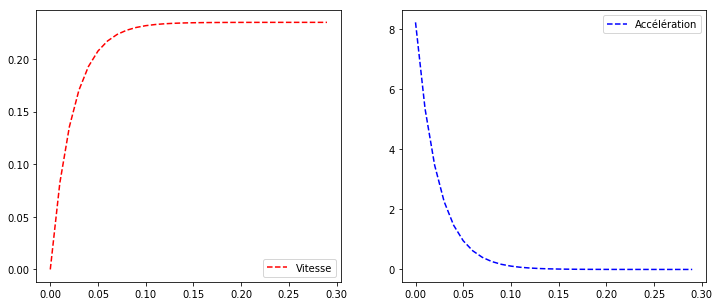

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(12, 5))

def plotEuler(v0,n,dt):
	t0 = 0
	X = [t0 + i*dt for i in range(n)]
	listeVitesses,listeAccelerations = euler(v0,n,dt)
	ax1.plot(X,listeVitesses,'r--',label='Vitesse')
	ax2.plot(X,listeAccelerations,'b--',label='Accélération')
    
plotEuler(0,30,0.01)
ax1.legend(loc="lower right")
ax2.legend(loc="upper right")
plt.show()

<div class="alert alert-info">

Suggestions pédagogiques
</div>

* **Interprétation du résultat**
 - Commenter la forme des courbes. Est-ce cohérent ?

## Animation susceptible d'être présentée aux élèves
La courbe de gauche donne la vitesse du corps en fonction du temps et la courbe de droite son accélération construite avec la méthode d'Euler.

In [6]:
%matplotlib inline
from matplotlib.pyplot import plot,show,subplots,close
import matplotlib.animation
from IPython.display import HTML

#ctes: 
n =40
v0 = 0
dt = 0.01
t0 = 0
#Création des figures
fig, (ax1,ax2) = subplots(1, 2,figsize=(12, 6))
courbeVitesses, = ax1.plot([],[],'.-',color="#1e7fcb")
courbeAcceleration, = ax2.plot([],[],'.-',color="#C4151C")
#Réglage des axes
ax1.set_xlim(( 0, 0.4))
ax1.set_ylim(( 0, 0.3))
ax2.set_xlim(( 0, 0.4))
ax2.set_ylim(( 0, 9))

def init():
    global courbeVitesse
    courbeVitesses.set_data([], [])
    courbeAcceleration.set_data([], [])
    return (courbeVitesses,) 

def animate(j):
    global courbeVitesse,courbeAcceleration,v0,t0,n
    listeAbscisses = [t0 + i*dt for i in range(j+1)]
    listeVitesses,listeAccelerations = euler(v0,j+1,dt)
    #print(euler2(0,5,0.1))
    courbeVitesses.set_data(listeAbscisses,listeVitesses)
    courbeAcceleration.set_data(listeAbscisses,listeAccelerations)
    
    ax1.set_title('Vitesse',color="#1e7fcb")
    ax2.set_title('Accélération',color="#C4151C")
    return (courbeVitesses,)

close ()
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=n,init_func=init,blit=False,interval=200)
# l'un ou l'autre
HTML(ani.to_jshtml())
#HTML(ani.to_html5_video())